# Overview of the problem

This is a Kaggle competition called spaceship-titanic to determine whether or not passengers were transported or not. We provide a classical solution and quantum solutions to this problem.


## Classical Solutions

- KNN
- Logistic Regression
- Decision Forest
- Neural Networks

## Quantum Solutions
- Variational Quantum Circuit
- Kernel-Methods

## Final Comment




## Import the library

In [287]:
# General
import tensorflow as tf
import pandas as pd
import numpy as np
import sklearn as sk

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Data processing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


# Decision forest
from sklearn.ensemble import RandomForestClassifier

# Linear regression
from sklearn.linear_model import LogisticRegression

# KNN
from sklearn.neighbors import KNeighborsClassifier

# Neural Networks
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import layers


import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")



In [288]:
print("TensorFlow v" + tf.__version__)

print("sklearn v" + sk.__version__)

TensorFlow v2.12.0
sklearn v1.3.2


## Loading the dataset

We have two datasets. A training and a test dataset

Dataset Description:

File and Data Field Descriptions

- `train.csv` - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
- `PassengerId` - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- `HomePlanet` - The planet the passenger departed from, typically their planet of permanent residence.
- `CryoSleep` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- `Cabin` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- `Destination` - The planet the passenger will be debarking to.
- `Age` - The age of the passenger.
- `VIP` - Whether the passenger has paid for special VIP service during the voyage.
- `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- `Name` - The first and last names of the passenger.
- `Transported` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

- test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.
- sample_submission.csv - A submission file in the correct format.
- `PassengerId` - Id for each passenger in the test set.
- `Transported` - The target. For each passenger, predict either True or False.# Load a dataset into a Pandas Dataframe
dataset_df = pd.read_csv("/kaggle/input/dataset-spaceship-competition/spaceship-titanic/train.csv")
print("Full train dataset shape is {}".format(dataset_df.shape))

In [289]:
# Load a dataset into a Pandas Dataframe
dataset_df = pd.read_csv("./spaceship-titanic/train.csv")
print("Full train dataset shape is {}".format(dataset_df.shape))
dataset_df.head(7)


Full train dataset shape is (8693, 14)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True


## Univariate Analysis 

Analysis of the data with numerical values

In [290]:
dataset_df.describe() # Access the univariate analysis

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [291]:
dataset_df.nunique() # The number of unique values. Important for histograms plot

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

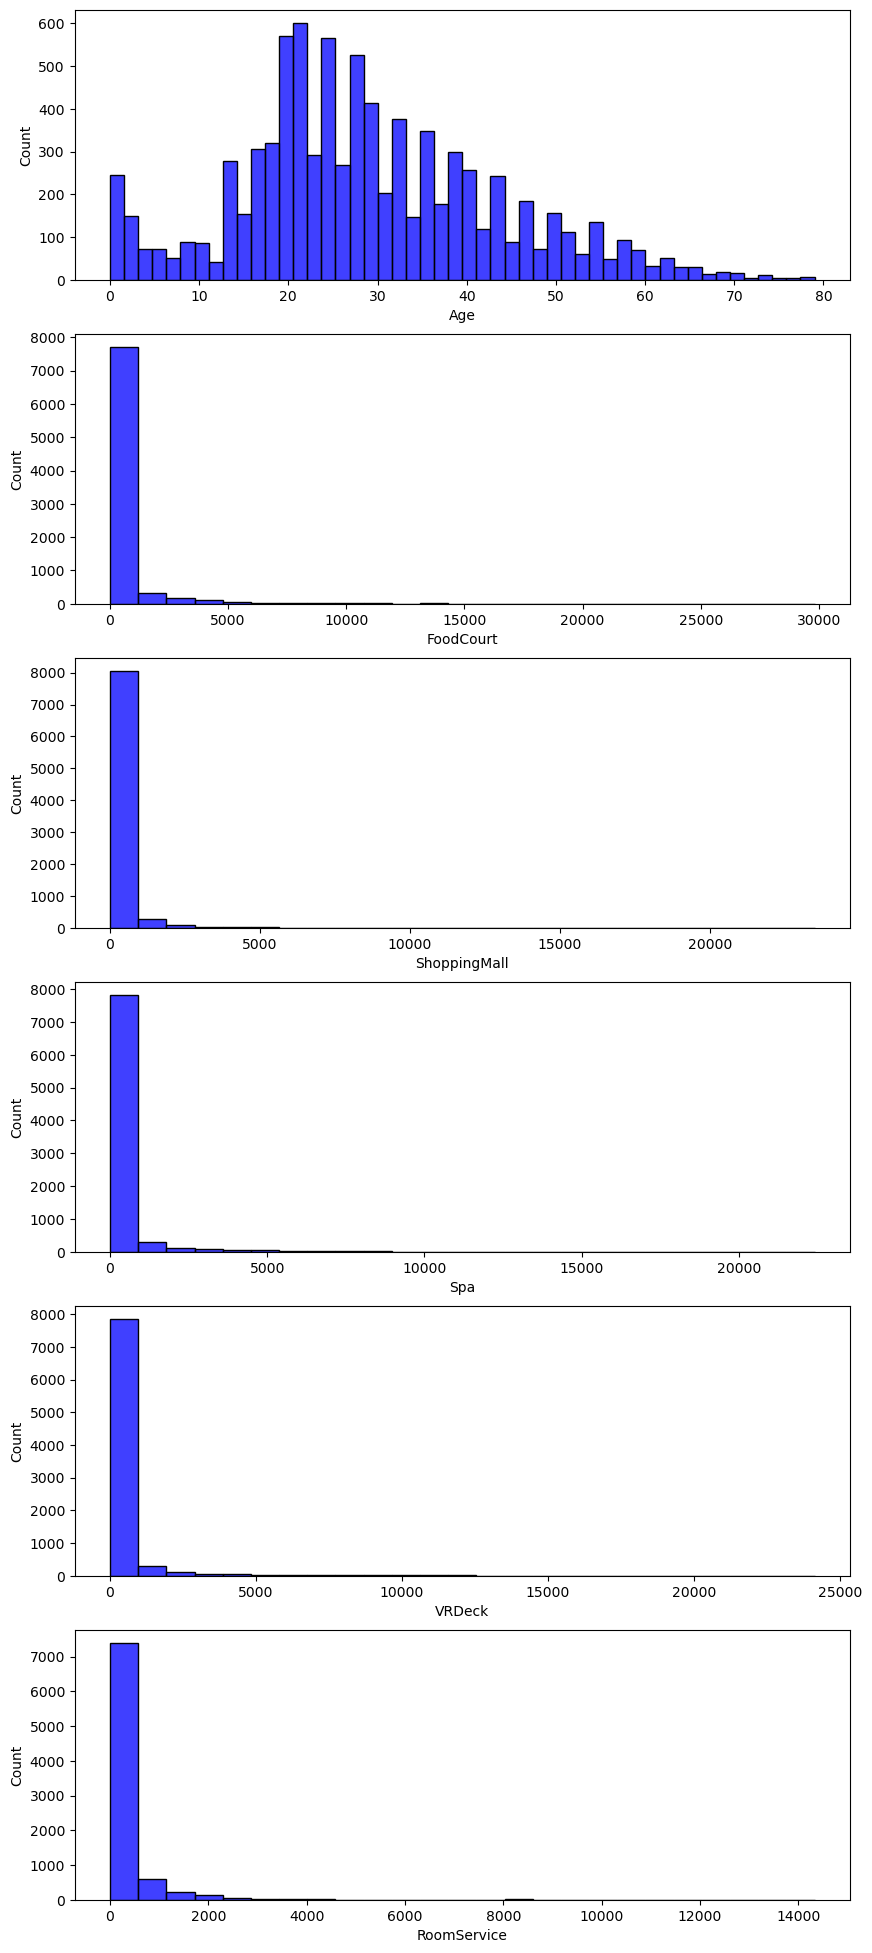

In [292]:
# Plotting the numerical data:
fig, ax = plt.subplots(6,1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)

sns.histplot(dataset_df['Age'], color='b', bins=50, ax=ax[0]);
sns.histplot(dataset_df['FoodCourt'], color='b', bins=25, ax=ax[1]);
sns.histplot(dataset_df['ShoppingMall'], color='b', bins=25, ax=ax[2]);
sns.histplot(dataset_df['Spa'], color='b', bins=25, ax=ax[3]);
sns.histplot(dataset_df['VRDeck'], color='b', bins=25, ax=ax[4]);
sns.histplot(dataset_df['RoomService'], color='b', bins=25, ax=ax[5]);

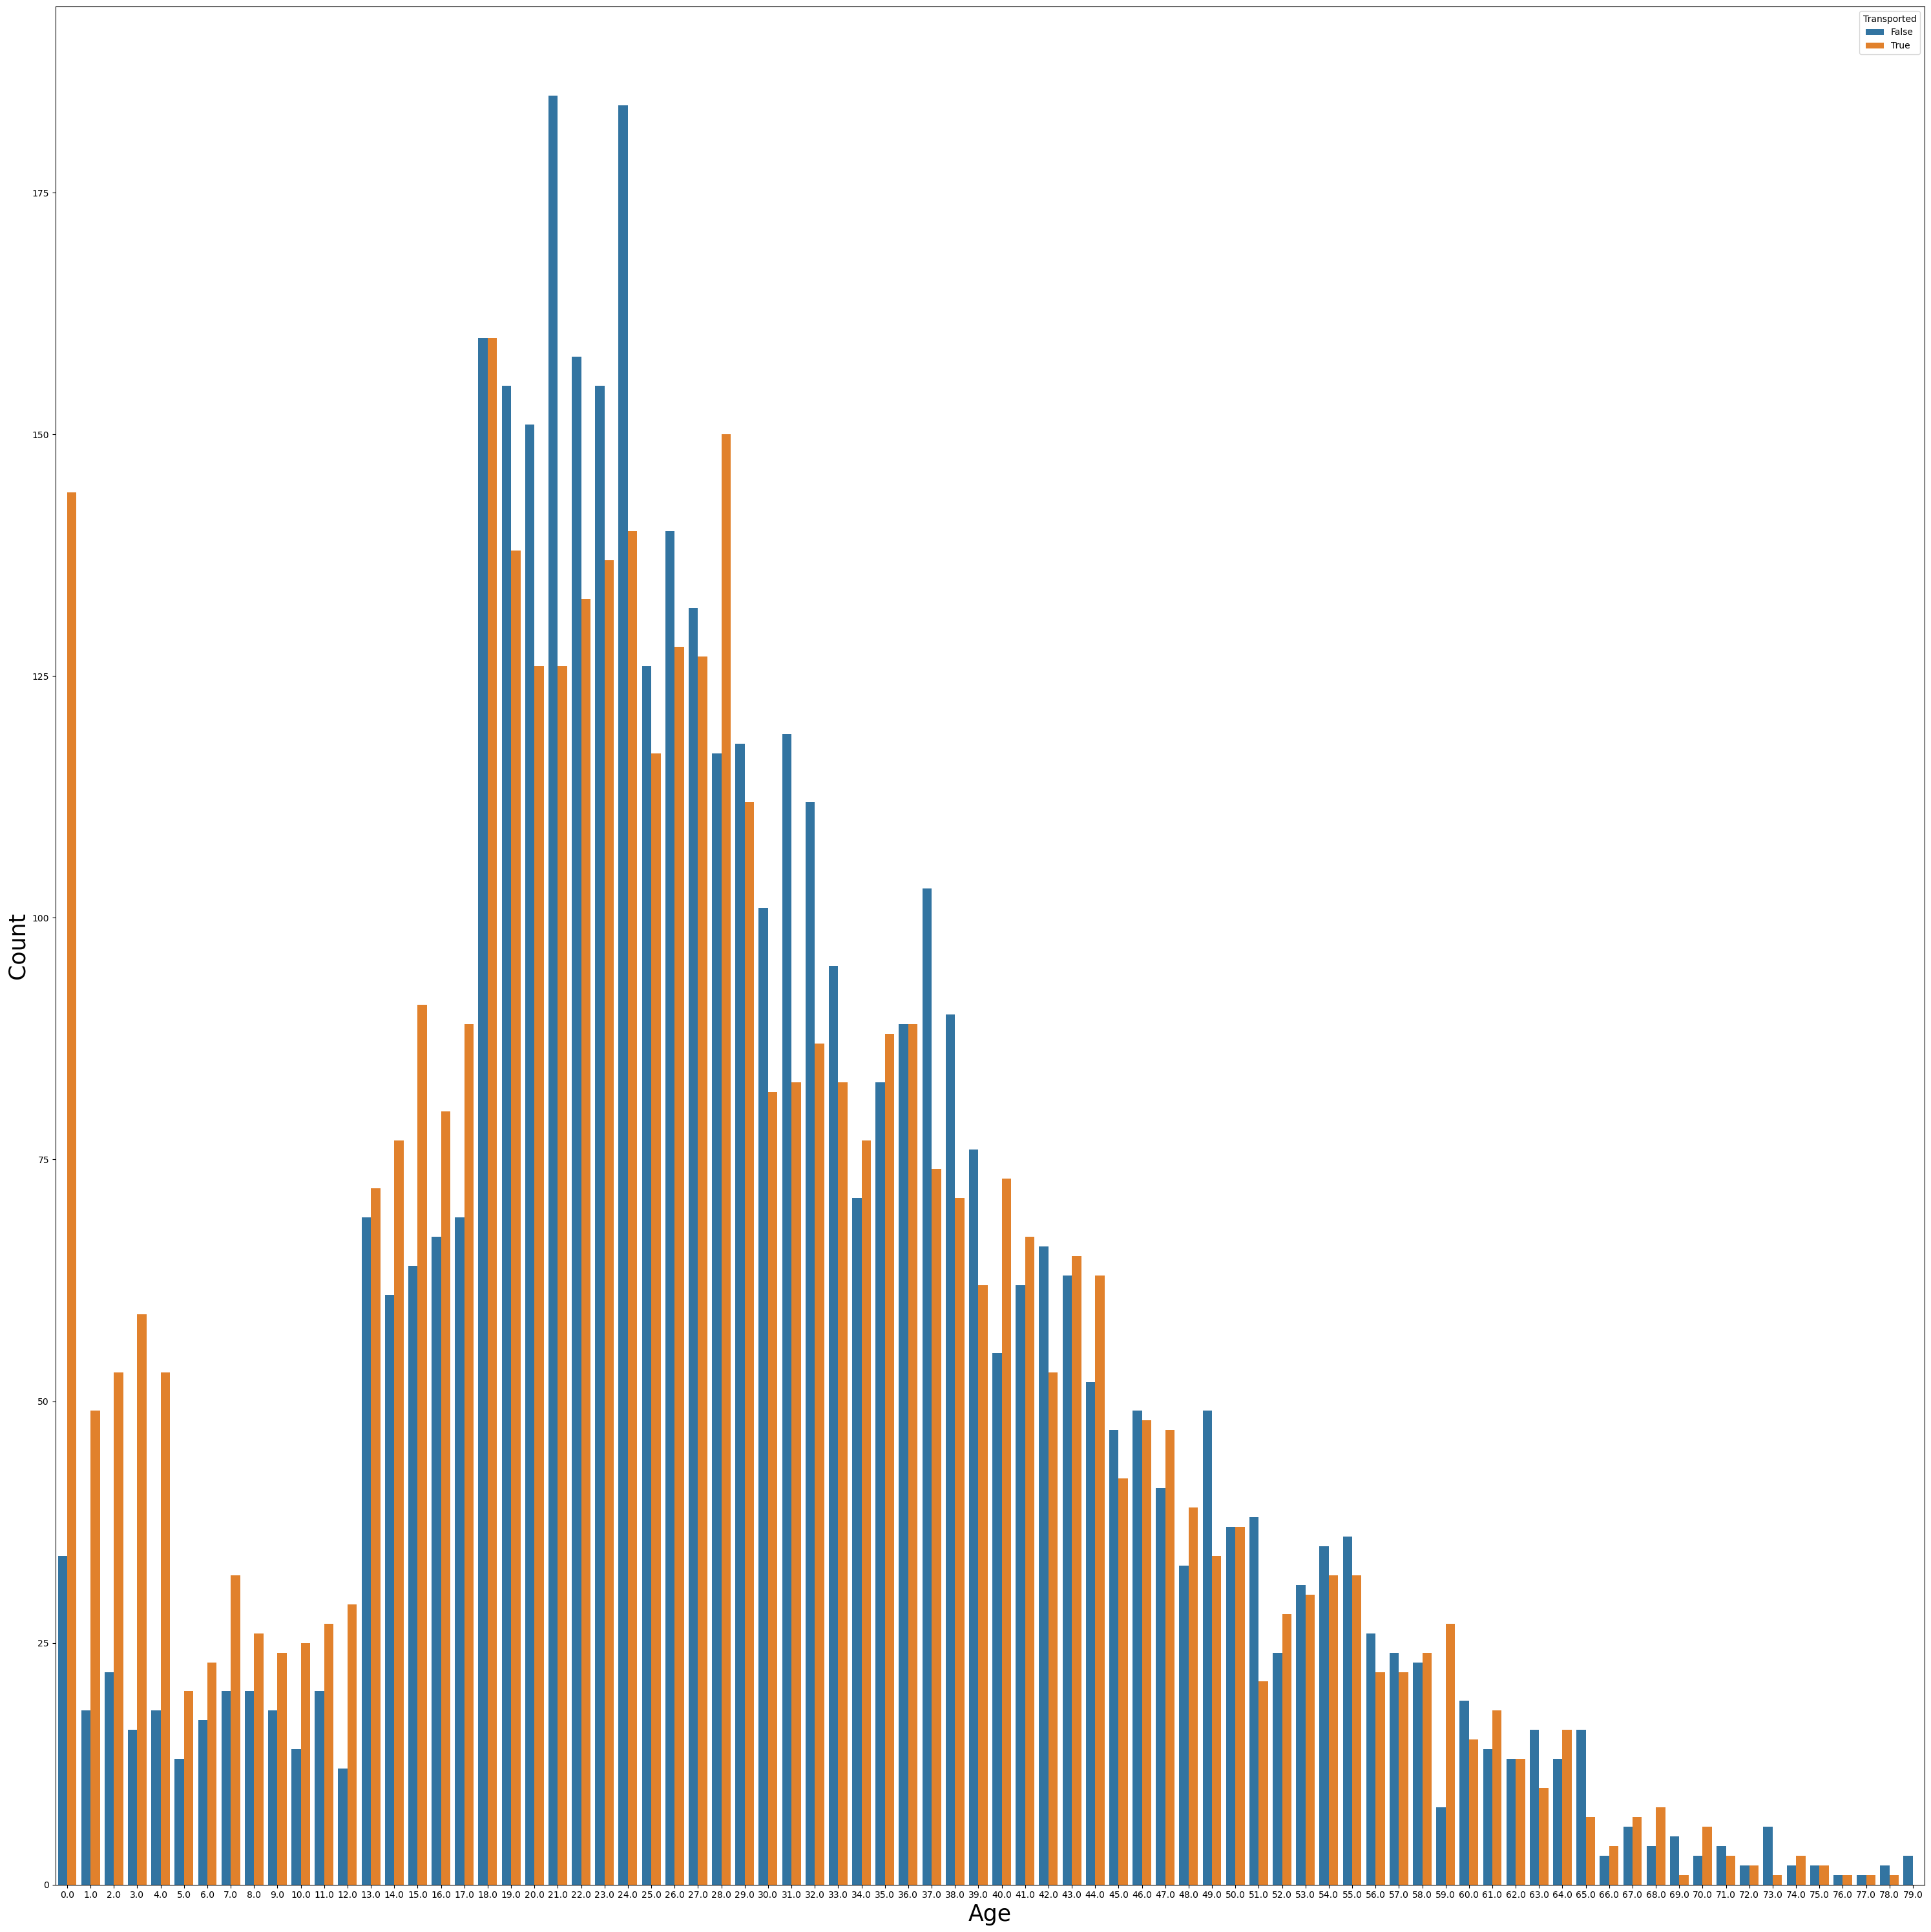

In [293]:
# Another way to present the data (this is only when there are not too many unique elements)

fig = plt.figure(layout="constrained", figsize = (30,30))
# Plot the third countplot on the third subplot
sns.countplot(x=dataset_df['Age'], hue=dataset_df['Transported'])

# Increase Font Size of axis labels:
plt.ylabel('Count', fontsize=25)
plt.xlabel('Age', fontsize=25)

# Adjust the layout
plt.tight_layout()
plt.show()

### Checking the correlations

In [294]:
# Easier to do this using correlations (with numerical values)
print(dataset_df["Transported"].corr(dataset_df["Age"]))
print(dataset_df["Transported"].corr(dataset_df["FoodCourt"]))
print(dataset_df["Transported"].corr(dataset_df["ShoppingMall"]))
print(dataset_df["Transported"].corr(dataset_df["Spa"]))
print(dataset_df["Transported"].corr(dataset_df["VRDeck"]))
print(dataset_df["Transported"].corr(dataset_df["CryoSleep"]))

-0.07502558362232596
0.04656639376472206
0.01014089002427717
-0.2211313492457285
-0.20707538958428998
0.46864486081240414


Given the above it is clear that: No correlation with `Age`, `Foodcourt`, `ShoppingMall`. But it has a correlation with: `Spa`, `VRDeck`, `CryoSleep`

## Bivariate Analysis

The analysis of all values that are not numerical but that do not have many different possible values. For instance, VIP has two possible values (True and False), Home Planet has 3 different possibilities and so on.

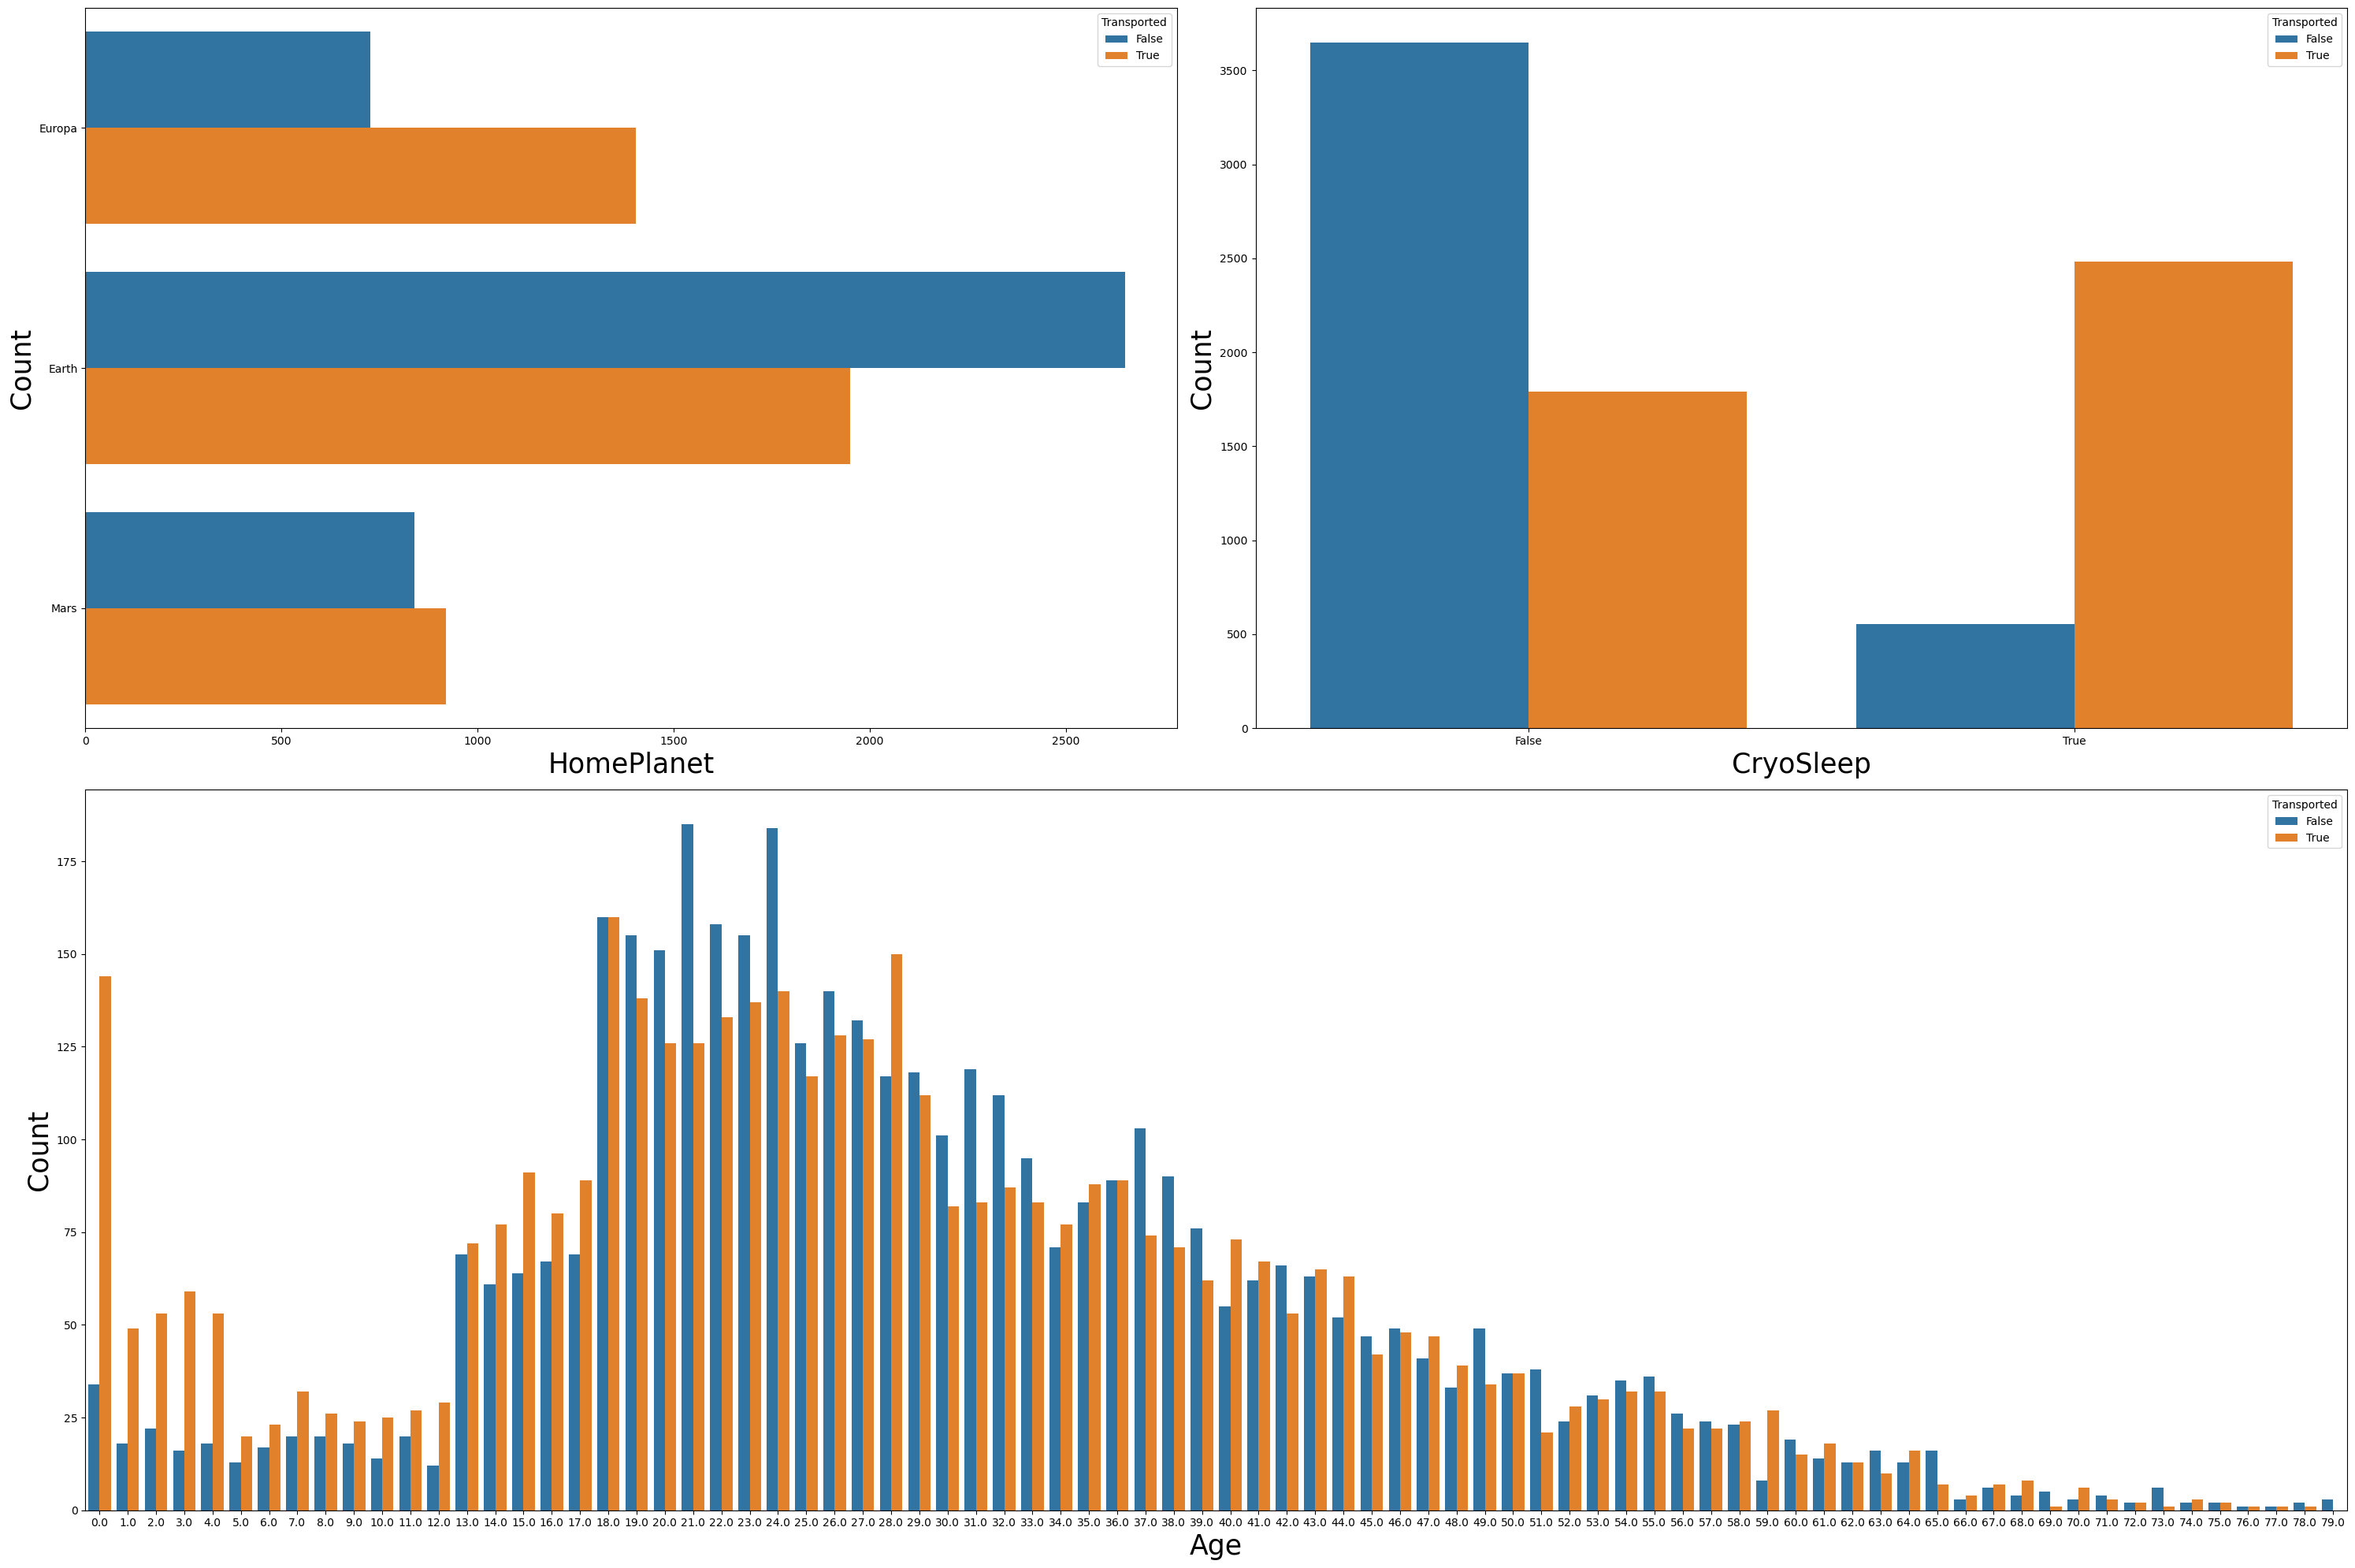

In [295]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(layout="constrained", figsize = (30,20))

gs = GridSpec(2,2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])


# Plot the first countplot on the first subplot
sns.countplot(y=dataset_df['HomePlanet'], hue=dataset_df['Transported'], ax=ax1)

# Plot the second countplot on the second subplot
sns.countplot(x=dataset_df['CryoSleep'], hue=dataset_df['Transported'], ax=ax2)

# Plot the third countplot on the third subplot
sns.countplot(x=dataset_df['Age'], hue=dataset_df['Transported'], ax=ax3)

# Increase Font Size of axis labels:
ax1.set_ylabel('Count', fontsize=25)
ax1.set_xlabel('HomePlanet', fontsize=25)
ax2.set_ylabel('Count', fontsize=25)
ax2.set_xlabel('CryoSleep', fontsize=25)
ax3.set_ylabel('Count', fontsize=25)
ax3.set_xlabel('Age', fontsize=25)

# Adjust the layout
plt.tight_layout()
plt.show()

<Axes: xlabel='VRDeck', ylabel='count'>

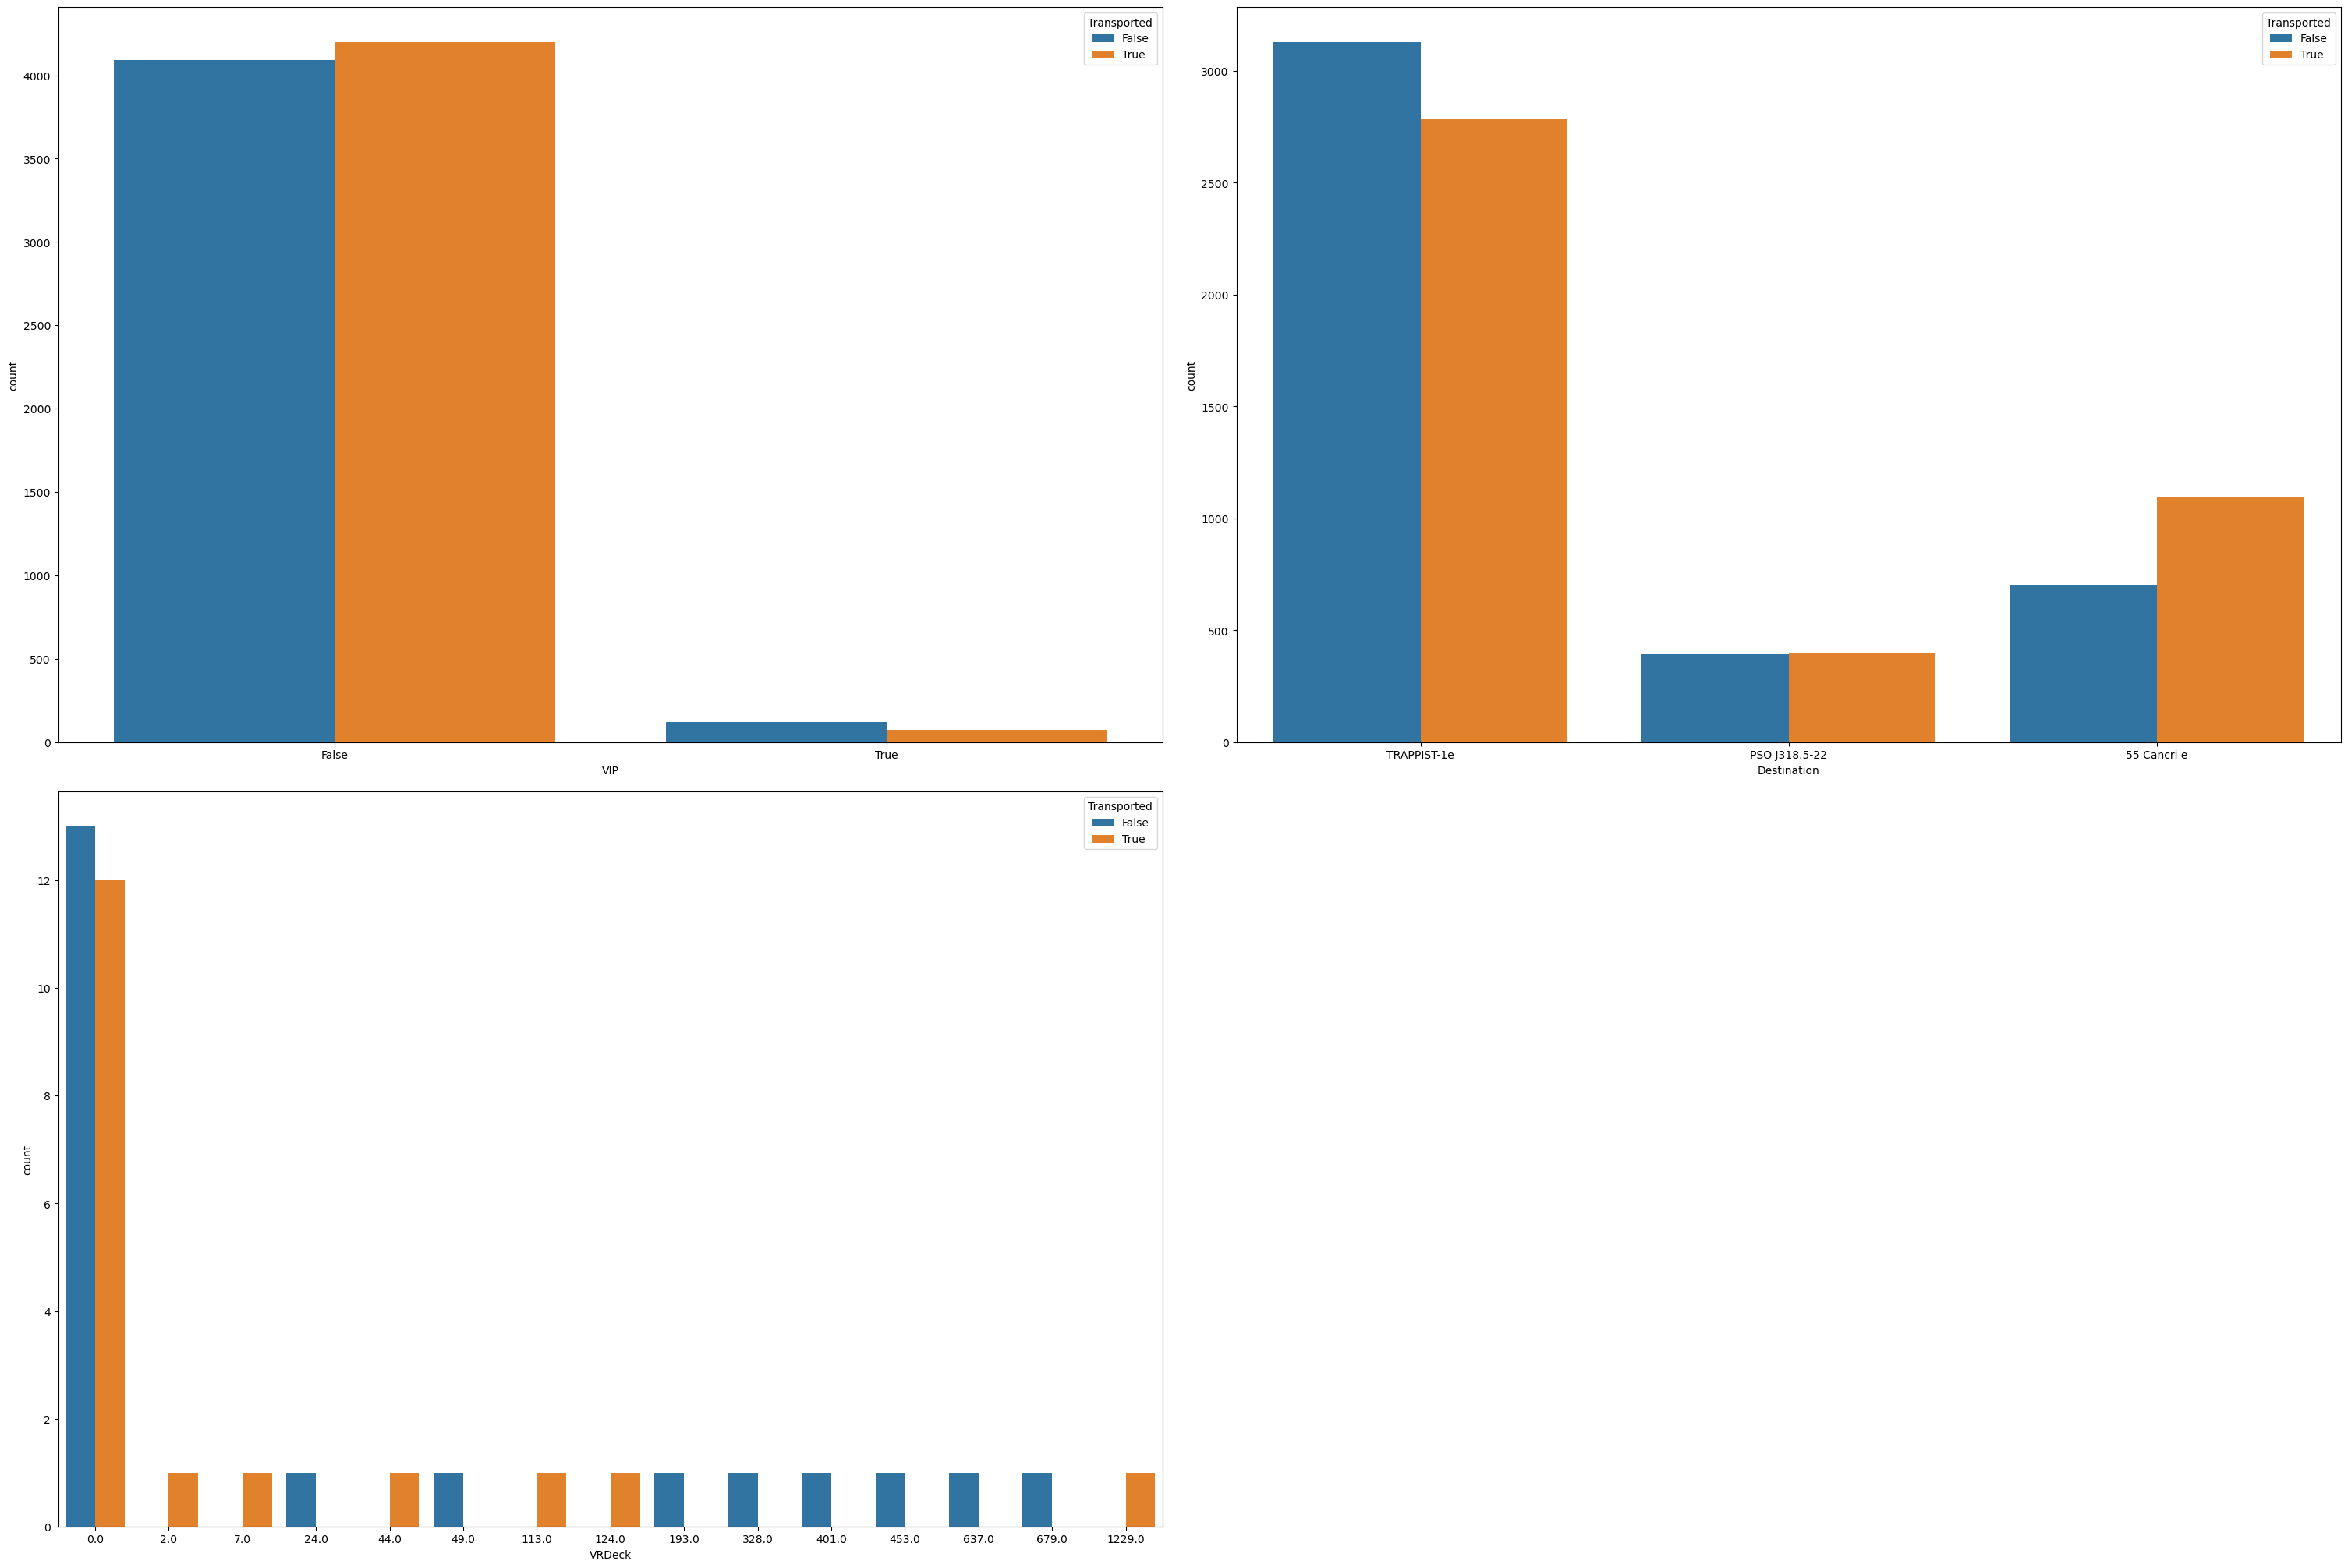

In [296]:
fig = plt.figure(layout="constrained", figsize = (30,20))

gs = GridSpec(2,2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])

sns.countplot(x=dataset_df['VIP'],hue=dataset_df['Transported'], ax = ax1)
#sns.scatterplot(x=dataset_df['Age'],y=dataset_df['FoodCourt'],hue=dataset_df['Transported']).plot()
#pd.crosstab(df['VIP'],df['Transported'])

sns.countplot(x=dataset_df['Destination'],hue=dataset_df['Transported'], ax = ax2)

sns.countplot(x=dataset_df['VRDeck'][0:40],hue=dataset_df['Transported'], ax = ax3)

### Testing Correlations with statistics
- $\chi^2$-test. We check if the p-value is superior to 0.05 (indicative of correlation)
- The second test is to measure the correlation directly

Chi^2 (p-value) test. We check if the p-value is superior to 0.05 to see if there is a correlation

In [297]:
from scipy.stats import chi2_contingency
# p-value
res = chi2_contingency(pd.crosstab(dataset_df['VIP'],dataset_df['Transported']))
print(res.pvalue)

# Measuring the correlation
print(dataset_df["Transported"].corr(dataset_df["VIP"]))


0.0006804064556968345
-0.03764972225919816



Clearly being `VIP` had not impact on whether you successfully transport or not

In [298]:
# Another way is to turn the categorical data into numerical and then compute correlations

<Axes: xlabel='Transported', ylabel='Spa'>

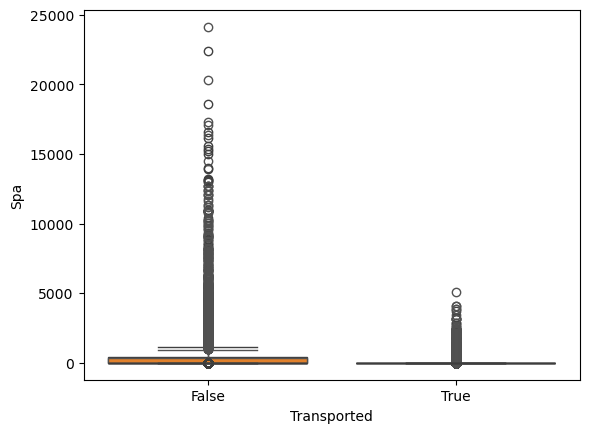

In [299]:
sns.boxplot(x='Transported', y='Spa', data=dataset_df)
sns.boxplot(x='Transported', y='VRDeck', data=dataset_df)
sns.boxplot(x='Transported', y='CryoSleep', data=dataset_df)

# Data Processing

We now process the data accordingly based on our numerical analysis.

In [300]:
dataset_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [301]:
dataset_df.info() # Give us the type of objects that we have for each variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [302]:
# Split cabin and drop irrelevant parameters
def splitCabin_and_drop(df):
    # if statement are there to avoid error if the columns has already been removed
    if 'Cabin' in df.columns:
        df[["Deck", "Cabin_num", "Side"]] = df["Cabin"].str.split("/", expand=True)
        df = df.drop(["Cabin"], axis=1)
    if 'PassengerId' in df.columns:
        df = df.drop(["PassengerId"], axis = 1)
    if 'Name' in df.columns:
        df = df.drop(["Name"], axis = 1)
    if 'Cabin_num' in df.columns:
        df = df.drop(['Cabin_num'], axis = 1)
    return df


dataset_df = splitCabin_and_drop(dataset_df)
dataset_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S


## Splitting

In [303]:
# Separate the X and y
X = dataset_df.drop(["Transported"], axis=1)
y = dataset_df.Transported

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8,random_state=0)

In [304]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6954 entries, 4278 to 2732
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    6798 non-null   object 
 1   CryoSleep     6784 non-null   object 
 2   Destination   6805 non-null   object 
 3   Age           6808 non-null   float64
 4   VIP           6778 non-null   object 
 5   RoomService   6803 non-null   float64
 6   FoodCourt     6806 non-null   float64
 7   ShoppingMall  6782 non-null   float64
 8   Spa           6802 non-null   float64
 9   VRDeck        6808 non-null   float64
 10  Deck          6803 non-null   object 
 11  Side          6803 non-null   object 
dtypes: float64(6), object(6)
memory usage: 706.3+ KB


## Encoding and Scaling the data (DATA CLEANING)

In [305]:
def preprocessing(encoder, X_train, X_test, col_list):
    """
    This processes the data for analysis (remove the NA values)
    
    This is how we will do this:
    
    """
    X_train[col_list] = encoder.fit_transform(X_train[col_list])
    X_test[col_list] = encoder.transform(X_test[col_list])
    return X_train, X_test

num_col = ['Age','FoodCourt','VRDeck','RoomService','Spa', 'ShoppingMall']
cat_col = ['HomePlanet','CryoSleep','Destination','VIP', 'Side', 'Deck']

od = OrdinalEncoder()
X_train[cat_col], X_test[cat_col] = preprocessing(od, X_train[cat_col], X_test[cat_col] , cat_col )


#Filling NA For numerical columns (Fill the missing values to correspond to the mean)
simp = SimpleImputer(strategy = 'mean')
X_train[num_col], X_test[num_col] = preprocessing(simp, X_train[num_col], X_test[num_col] , num_col )


#Filling NA For categorical columns (Fill the missing values to correspond to 0)
simp = SimpleImputer(strategy = 'constant', fill_value=0)
X_train[cat_col], X_test[cat_col] = preprocessing(simp, X_train[cat_col], X_test[cat_col] , cat_col )


# Scale the data so that the mean is zero and the std is 1
scale = StandardScaler()
X_train[num_col] = scale.fit_transform(X_train[num_col])
X_test[num_col] = scale.transform(X_test[num_col])

### One-hot encoding
We do this for `Destination`, `Deck`, `Side`, which are the categorical varibales that are not true or false

In [306]:
def one_hot_encoding(df, col_names):
    """
    Takes a dataset (df) and do a one-hot encoding of the data described by col_names.
    
    Imput:
    df (pandas.Dataframe) Represents the datasets
    col_names (list or np.array of str) The names of the columns of df we want to one-hot encode
    """
    for col in col_names:
        if col in df.columns:
            df = pd.get_dummies(df, columns = [col])
    
    return df
    
dataset_df = one_hot_encoding(dataset_df, ["Destination", "Side", "Deck", "HomePlanet"])
dataset_df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Destination_55 Cancri e,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,False,...,True,False,False,False,False,False,False,False,True,False
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,False,...,False,False,False,False,True,False,False,True,False,False
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,False,...,False,False,False,False,True,False,False,True,False,False


In [307]:
dataset_df.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Transported', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Side_P',
       'Side_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F',
       'Deck_G', 'Deck_T', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars'],
      dtype='object')

# KNN

In [73]:
from sklearn.metrics import accuracy_score

#X_test = np.ascontiguousarray(X_test)

k_scores_test = []
weight_test = []
for weight in ["uniform", "distance"]:
    for k in range(1, 101):
        Kclassifier_test = KNeighborsClassifier(n_neighbors=k, weights = weight)
        Kclassifier_test.fit(X_train, y_train)
        Kclassifier_predictions_test = Kclassifier_test.predict(X_test)
        score = accuracy_score(Kclassifier_predictions_test, y_test)
        k_scores_test.append(score)
        weight_test.append(weight)

In [74]:
max_accuracy = max(k_scores_test)
best_k = k_scores_test.index(max_accuracy) + 1
print(best_k, max_accuracy, weight_test[best_k-1])

21 0.79700977573318 uniform


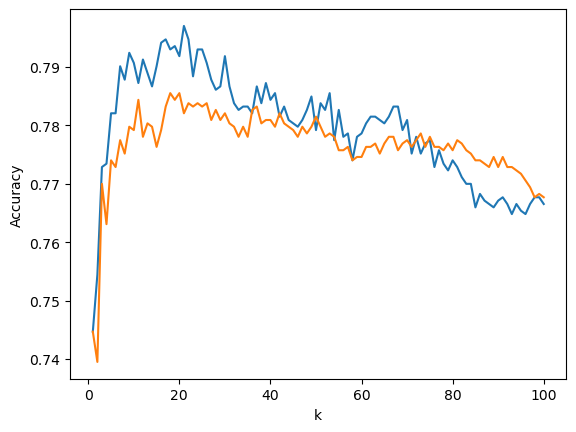

In [75]:
k_list = list(range(1, 101))
plt.plot(k_list, k_scores_test[:len(k_list)])
plt.plot(k_list, k_scores_test[len(k_list):])
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show()
# Blue: uniform weight, orange: distance weight

In [76]:
""" TESTING """
TEST = False

if TEST == True:
    test = test.to_numpy()
    Kclassifier = KNeighborsClassifier(n_neighbors=best_k)
    Kclassifier.fit(X, y)
    Kclassifier_predictions = Kclassifier_test.predict(test)
    
    
    output = pd.DataFrame({"PassengerId": test_id, "Transported": RF_Model_predictions})
    output.to_csv("RF_Model_submission.csv", index=False)

# Logistic Regression

In [77]:
# Regularizer:
penalty = ["l2", "l1", "elasticnet", None]
hyper_params = np.arange(0.25, 5, 0.25)

accuracy = 0.0 # Keep track of accuracy
solver = ["newton-cg", "lbfgs", "liblinear", 'sag', "saga"]
for s in solver:
    for C in hyper_params:
        LR_Model_test = LogisticRegression(C = C, random_state=1, max_iter= 150, solver = s)
        LR_Model_test.fit(X_train, y_train)
        LR_Model_predictions_test = LR_Model_test.predict(X_test)

        LR_Model_accuracy_test = accuracy_score(LR_Model_predictions_test, y_test)
        if LR_Model_accuracy_test > accuracy:
            max_acc_params = (s, C) # store the Penalty and C chosen for the max_accuracy
            

print(f"Validation MAE for Logistic Regression: {LR_Model_accuracy_test:,.3f}")
print(f"Parames of Logistic Regression: {max_acc_params}")

Validation MAE for Logistic Regression: 0.777
Parames of Logistic Regression: ('saga', 4.75)


In [78]:
# We know that "saga" is the best, so we now choose the best regularizer.
penalty = ["l2", "l1", "elasticnet"]
hyper_params = np.arange(0.25, 5, 0.25)

accuracy = 0.0 # Keep track of accuracy

for p in penalty:
    for C in hyper_params:
        LR_Model_test = LogisticRegression(penalty = p, C = C, random_state=1, max_iter= 150, solver = 'saga', l1_ratio = 0.5)
        LR_Model_test.fit(X_train, y_train)
        LR_Model_predictions_test = LR_Model_test.predict(X_test)

        LR_Model_accuracy_test = accuracy_score(LR_Model_predictions_test, y_test)
        if LR_Model_accuracy_test > accuracy:
            max_acc_params = (p, C) # store the Penalty and C chosen for the max_accuracy
            

print(f"Validation MAE for Logistic Regression: {LR_Model_accuracy_test:,.3f}")
print(f"Parames of Logistic Regression: {max_acc_params}")

Validation MAE for Logistic Regression: 0.777
Parames of Logistic Regression: ('elasticnet', 4.75)


In [79]:
"""TESTING """
TEST = False;

if TEST == True:
    LR_Model = LogisticRegression(random_state=1, max_iter=150, solver = "saga", C = 4.75, penalty = "elasticnet", l1_ratio=0.5)
    LR_Model.fit(X, y)
    LR_Model_predictions = LR_Model.predict(test)
    
    
    output = pd.DataFrame({"PassengerId": test_id, "Transported": LR_Model_predictions})
    output.to_csv("LR_Model_submission.csv", index=False)

# RANDOM FOREST

In [80]:
def build_all_models(max_depths,
                     min_samples_split,
                     criterion,
                     X_train=X_train,
                     y_train=y_train,
                     X_test=X_test,
                     y_test=y_test):
    """
    Parameters:
        `max_depths` - A list of values representing the max_depth values to be
                       try as hyperparameter values
        `min_samples_split` - An list of values representing the min_samples_split
                       values to try as hyperpareameter values
        `criterion` -  A string; either "entropy" or "gini"

    Returns a dictionary, `out`, whose keys are the the hyperparameter choices, and whose values are
    the training and validation accuracies (via the `score()` method).
    In other words, out[(max_depth, min_samples_split)]['val'] = validation score and
                    out[(max_depth, min_samples_split)]['train'] = training score
    For that combination of (max_depth, min_samples_split) hyperparameters.
    """
    out = {}

    for d in max_depths:
        for s in min_samples_split:
            out[(d, s)] = {}
            # Create a DecisionTreeClassifier based on the given hyperparameters and fit it to the data
            rf = RandomForestClassifier(random_state = 1, criterion=criterion, min_samples_split=s, max_depth=d)
            rf = rf.fit(X_train, y_train) # Fit to our dataset.

            # TODO: store the validation and training scores in the `out` dictionary
            out[(d, s)]['val'] = rf.score(X_test, y_test) # TODO
            out[(d, s)]['train'] = rf.score(X_train, y_train) # TODO
    return out

In [82]:
# Hyperparameters values to try in our grid search
criterions = ["entropy", "gini"]
max_depths = [1, 5, 10, 15, 20, 25, 30, 50, 100]
min_samples_split = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

for criterion in criterions:
    print("\nUsing criterion {}".format(criterion))
    res = build_all_models(max_depths, min_samples_split, criterion, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test) # TODO: call `build_all_models` for the given hyperparameters
    # TODO: complete this loop which should search for the optimal
    #  (max_depth, min_samples_split) given this criterion
    max_accuracy = 0.0
    for d, s in res:
      result = res.get((d,s))
      if float(result['val']) > max_accuracy: #float(result['val']+result["train"])
        max_accuracy = result['val'] #result['val']+result["train"]
        max_data = (d,s, result['val'],result["train"])
        best_criterion = criterion
    print('Best Criterion', best_criterion,"Max_depths:", max_data[0], "; ", "min_sample:", max_data[1],"; ", "val accuracy:", max_data[2],"; " "train_accuracy:", max_data[3])


RF_Model_test = RandomForestClassifier(random_state=1, criterion= best_criterion, min_samples_split=max_data[1], max_depth=max_data[0])
RF_Model_test.fit(X_train, y_train)
RF_Model_predictions_test = RF_Model_test.predict(X_test)
RF_Model_accuracy_test = accuracy_score(RF_Model_predictions_test, y_test)

print(f"Validation MAE for Random Forest Model: {RF_Model_accuracy_test:,.3f}")


Using criterion entropy
Best Criterion entropy Max_depths: 20 ;  min_sample: 16 ;  val accuracy: 0.8096607245543416 ; train_accuracy: 0.8806442335346563

Using criterion gini
Best Criterion gini Max_depths: 15 ;  min_sample: 32 ;  val accuracy: 0.8125359401955147 ; train_accuracy: 0.8484325568018407
Validation MAE for Random Forest Model: 0.813


In [85]:
""" TESTING """
TEST = False;

if TEST == True:

    RF_Model = RandomForestClassifier(random_state=1, criterion= best_criterion, min_samples_split=max_data[1], max_depth=max_data[0])
    RF_Model.fit(X, y)
    RF_Model_predictions = RF_Model.predict(test)
    output = pd.DataFrame({"PassengerId": test_id, "Transported": RF_Model_predictions})
    output.to_csv("RF_Model_submission.csv", index=False)

# Neural Networks


## Loop over hyperparameters:

We see here that looping over hyperparameters decrease the accuracy of the model in general more some weird reason

In [309]:
## LOOP over different parameters:
"""
# hyperparameters
units1 = [16, 32, 64, 128, 256, 512, 1024]
units2 = [16, 32, 64, 128, 256, 512, 1024]
optimizer = ["adam", "sgd", 'rmsprop', 'adagrad', 'adadelta', 'adamax', 'nadam', 'ftrl'] # Some other choices
loss = ["binary_crossentropy", "squared_hinge", "hinge"] # For binary outputs
metrics = ['binary_accuracy']
"""

## Hyperparameters list
units1 = [128, 256, 512]
units2 = [128, 256, 512]
optimizer = ["adam"]
loss = ["binary_crossentropy"]


## LOOP over different numbers of layers
@tf.autograph.experimental.do_not_convert
def build_NNs(X_train = X_train, units1 = units1, units2 = units2):
    """
    Build all NNs with different numbers of layers. 

    Return: (dict)

    {(unit1, unit2) : Model}
    """
    out = {}
    
    for u1 in units1:
        for u2 in units2:
            out[(u1, u2)] = keras.Sequential([
    layers.BatchNormalization(),# Normalize the value of the inputs value passed into the first layer of the network
    layers.Dense(units = u1,activation='relu',input_shape = [X_train.shape[1]]), #Dense layer is when you passed the linear transformation z = W*x + b and then passed z through the ReLU activation function 
    layers.Dropout(rate = 0.3),# This sets some of the input values (30%) of the first hidden layer created above to zero, so that the network is not overly dependent on the input parameters (it is a regularization technique)
    layers.BatchNormalization(), 
    layers.Dense(units = u2,activation='relu'), # ReLU(x) = max(0, x) (if x >= 0, then it gives the value of x, otherwise it gives 0)
    layers.Dropout(rate = 0.3),
    layers.BatchNormalization(),
    layers.Dense(units = 1,activation='sigmoid'), # Sigmoid = 1/(1+e^(-x)). It's the output layers.
    ])
    
    return out
   
    
## LOOP over different compilers
@tf.autograph.experimental.do_not_convert
def all_compile_NNs(NNs_dict, optimizer = optimizer, loss = loss):
    """
    We compile all the model using different compiling protocols
    
    """
    out = {}
    for key, model in NNs_dict.items():
        for op in optimizer:
            for l in loss:
                model.compile(optimizer = op, loss = l, metrics = ['binary_accuracy'])
                out[(key[0], key[1], op, l )] = model


    return out

"""
We call early stopping as a resort to avoid overfitting of model. 
The below code means if a minimum change of 0.001 is not observed over 20 epochs then stop the training.
"""

early_stopping = keras.callbacks.EarlyStopping(
    patience=20, # Specifies the number of epoch (number of forward steps) with no improvement after which the training stop (So if the validation percentage does not increase for 20 consecutive epochs, it's going to stop the training)
    min_delta=0.001, # This is the minimum change in validation loss (speaks about ability of the system to predict new data) that is required for an epoch to be consider successful
    restore_best_weights=True, # If the training is stopped, we take the best weights (the ones that lead to the lowest validation loss) of all the analysis we did
)


@tf.autograph.experimental.do_not_convert
def k_most_accurate_models(NNs_dict, k=5, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    """
    Extract the k most accurate model

    Return
    - a dict where key are the choices of hyperparams and the values are [model, accuracy, loss, history]
    - We pick the k most accurate (by accuracy) models of the entire list of NNs
    """

    out = {}
    for key, model in NNs_dict.items():
        history = model.fit(
            X_train, y_train,
            validation_data=(X_test, y_test),
            batch_size=512,  # This is the number of randomly chosen samples (datapoints of the full training dataset) that we consider for updating the weights. This makes the computation faster than if we update the weights for all the 4000 something datapoints every epoch
            epochs=1000,  # The number of epochs (forward steps) that we carry out
            callbacks=[early_stopping],  # Set some conditions for which the training process might stop
            verbose=0,  # 0: means no output will be displayed during training. If you set it to 1, you get the results for every epoch
        )
        loss, accuracy = model.evaluate(X_test, y_test)

        NNs_dict[key] = [model, accuracy, loss, history]

        print(f"Model: {key}")
        #print(f"Accuracy: {accuracy}")
        #print("History:")
        #print(history)

    k_most_accurate_keys = sorted(NNs_dict.items(), key=lambda x: x[1][1], reverse=True)[:k]

    return k_most_accurate_keys

      
NNs_dict = build_NNs(units1 = units1, units2 = units2)
NNs_dict = all_compile_NNs(NNs_dict, optimizer = optimizer, loss = loss)
list_of_models = k_most_accurate_models(NNs_dict, k = 1)

        

Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x1774954e0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x1774954e0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x1774954e0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x177375800>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not ge

Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x177375800>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x177375800>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
55/55 [==============================] - 0s 2ms/step - loss: 0.4089 - binary_accuracy: 0.8016
Model: (128, 128, 'adam', 'binary_crossentropy')
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x17409dee0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source fil

Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x17409dee0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x17409dee0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x16ff70220>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not ge

Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x16ff70220>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x16ff70220>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
55/55 [==============================] - 0s 3ms/step - loss: 0.4090 - binary_accuracy: 0.8045
Model: (128, 256, 'adam', 'binary_crossentropy')
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x17409f740>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source fil

Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x17409f740>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x17409f740>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x16bbb4b80>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not ge

Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x16bbb4b80>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x16bbb4b80>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
55/55 [==============================] - 0s 3ms/step - loss: 0.4101 - binary_accuracy: 0.7964
Model: (128, 512, 'adam', 'binary_crossentropy')
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x16bcfd4e0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source fil

Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x16bcfd4e0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x16bcfd4e0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x16bcffd80>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not ge

Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x16bcffd80>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x16bcffd80>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
55/55 [==============================] - 0s 2ms/step - loss: 0.4101 - binary_accuracy: 0.7959
Model: (256, 128, 'adam', 'binary_crossentropy')
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x1810cce00>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source fil

Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x1810cce00>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x1810cce00>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x16c266a20>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not ge

Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x16c266a20>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x16c266a20>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
55/55 [==============================] - 0s 2ms/step - loss: 0.4117 - binary_accuracy: 0.7918
Model: (256, 256, 'adam', 'binary_crossentropy')
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x16c2644a0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source fil

Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x16c2644a0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x16c2644a0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x17202aac0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not ge

Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x17202aac0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x17202aac0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
55/55 [==============================] - 0s 3ms/step - loss: 0.4108 - binary_accuracy: 0.7964
Model: (256, 512, 'adam', 'binary_crossentropy')
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x17972e0c0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source fil

Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x17972e0c0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x17972e0c0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x16cca3600>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not ge

Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x16cca3600>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x16cca3600>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
55/55 [==============================] - 0s 3ms/step - loss: 0.4073 - binary_accuracy: 0.8016
Model: (512, 128, 'adam', 'binary_crossentropy')
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x174067560>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source fil

Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x174067560>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x174067560>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x178f493a0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not ge

Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x178f493a0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x178f493a0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
55/55 [==============================] - 0s 4ms/step - loss: 0.4110 - binary_accuracy: 0.8010
Model: (512, 256, 'adam', 'binary_crossentropy')
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x178f4bd80>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source fil

Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x178f4bd80>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x178f4bd80>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x1771a3420>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not ge

Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x1771a3420>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x1771a3420>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
55/55 [==============================] - 0s 3ms/step - loss: 0.4104 - binary_accuracy: 0.8028
Model: (512, 512, 'adam', 'binary_crossentropy')


55/55 [==============================] - 0s 3ms/step - loss: 0.4090 - binary_accuracy: 0.8045

Validation Loss: 0.40900835394859314, Validation Accuracy: 0.8044853210449219


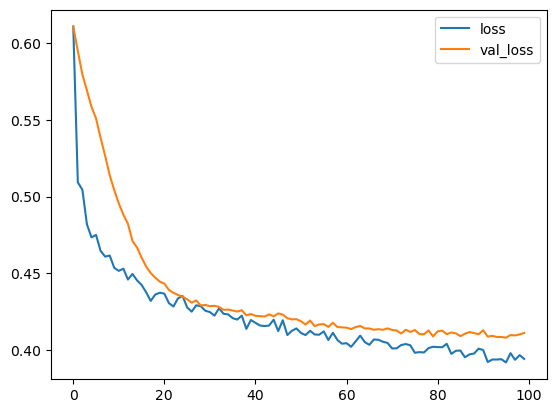

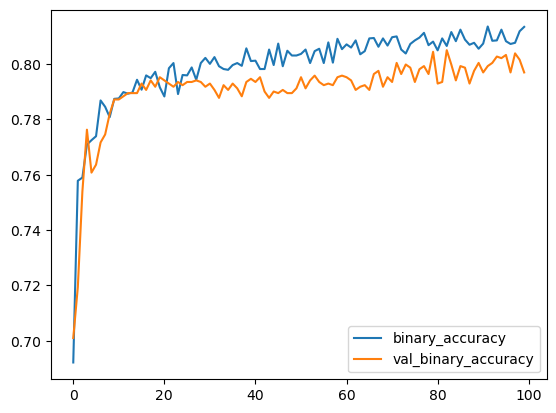

In [311]:
# Assuming you have called k_most_accurate_models and stored its result in best_model_info
best_model_info = list_of_models

# Extracting the model, accuracy, loss, and history from the best model
best_model_key, [best_model, best_accuracy, best_loss, best_history] = best_model_info[0]

# Get the training and validation loss from the history
best_model_loss = best_history.history['loss']
best_model_val_loss = best_history.history['val_loss']

# Get the training and validation accuracy from the history
best_model_accuracy = best_history.history['binary_accuracy']
best_model_val_accuracy = best_history.history['val_binary_accuracy']

# Creating a DataFrame from the history
best_model_history_df = pd.DataFrame(best_history.history)

# Plotting the loss and accuracy
best_model_history_df[['loss', 'val_loss']].plot()
best_model_history_df[['binary_accuracy', 'val_binary_accuracy']].plot()

# Evaluating the model on test data
best_model_loss, best_model_accuracy = best_model.evaluate(X_test, y_test)
print()
print(f"Validation Loss: {best_model_loss}, Validation Accuracy: {best_model_accuracy}")



# Quantum Solutions

We will be using PennyLane by Xanadu (https://pennylane.ai)

## Variational Circuits:
- MPS (Matrix Product State) tensor networks
- Strongly Entangling Layers


We will see that the MPS circuit does not have strong enough entanglement to make predictions.

## Kernel
- Angle Encoding and measurements of the qubits in the projector of the $\ket{00...0}$ state. This is the simplest Kernel that we can define.

## Importing the library

In [314]:
# General
import tensorflow as tf
import pandas as pd
import numpy as np
import sklearn as sk

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Data processing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [315]:
import pennylane as qml
import pennylane.numpy as npp
import matplotlib.pyplot as plt
import pdb
print("pennylane" + qml.__version__)

pennylane0.34.0


In [316]:

# Load a dataset into a Pandas Dataframe
dataset_df = pd.read_csv("./spaceship-titanic/train.csv")
print("Full train dataset shape is {}".format(dataset_df.shape))
dataset_df.head(7)


# --------------------------------------------------------------------------------------------------------------------------------------------

# Split cabin and drop irrelevant parameters
def splitCabin_and_drop(df):
    # if statement are there to avoid error if the columns has already been removed
    if 'Cabin' in df.columns:
        df[["Deck", "Cabin_num", "Side"]] = df["Cabin"].str.split("/", expand=True)
        df = df.drop(["Cabin"], axis=1)
    if 'PassengerId' in df.columns:
        df = df.drop(["PassengerId"], axis = 1)
    if 'Name' in df.columns:
        df = df.drop(["Name"], axis = 1)
    if 'Cabin_num' in df.columns:
        df = df.drop(['Cabin_num'], axis = 1)
    return df


dataset_df = splitCabin_and_drop(dataset_df)
dataset_df.head()

# --------------------------------------------------------------------------------------------------------------------------------------------


# Separate the X and y
X = dataset_df.drop(["Transported"], axis=1)
y = dataset_df.Transported.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8,random_state=0)



# --------------------------------------------------------------------------------------------------------------------------------------------

## We will perform a frequency encoding for the numerical data.
cat_col = ['CryoSleep', 'VIP', ]
freq_col = ['HomePlanet', "Deck", "Side", 'Destination']
num_col = ['Age','FoodCourt','VRDeck','RoomService','Spa', 'ShoppingMall']


#Filling NA For numerical columns (Fill the missing values to correspond to 0)
simp = SimpleImputer(strategy = "constant", fill_value = 0)
X_train[num_col] = simp.fit_transform(X_train[num_col])
X_test[num_col] = simp.transform(X_test[num_col])

#Filling NA For categorical columns (Fill the missing values to correspond to 0)
simp = SimpleImputer(strategy = 'constant', fill_value=0)
X_train[cat_col] = simp.fit_transform(X_train[cat_col])
X_test[cat_col] = simp.transform(X_test[cat_col])
# Use LabelEncoder to replace True with 1 and False with 0
le = LabelEncoder()
for col in cat_col:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])


simp = SimpleImputer(strategy = 'constant', fill_value=0)
X_train[freq_col] = simp.fit_transform(X_train[freq_col])
X_test[freq_col] = simp.transform(X_test[freq_col])

## Do the frequency encoding
def frequency_encode_column(df, column_list):
    for column_name in column_list:
        # Exclude missing inputs set to zero
        non_zero_values = df[df[column_name] != 0]
        value_counts = non_zero_values[column_name].value_counts(normalize=True).to_dict()
        df[column_name] = df[column_name].map(value_counts)
    
frequency_encode_column(X_test, freq_col)
frequency_encode_column(X_train, freq_col)

X_test.fillna(0, inplace=True)
X_train.fillna(0, inplace=True)


scale = StandardScaler()
X_train[num_col] = scale.fit_transform(X_train[num_col])
X_test[num_col] = scale.transform(X_test[num_col])


scale = StandardScaler()
X_train[freq_col] = scale.fit_transform(X_train[freq_col])
X_test[freq_col] = scale.transform(X_test[freq_col])

X_test.shape, X_train.shape

Full train dataset shape is (8693, 14)


((1739, 12), (6954, 12))

### Perform PCA 
The goal here is to reduce the overall number of features to the most important ones. This is necessary for our system, because our qubit encoding encodes one feature to one qubit.

In [317]:
from sklearn.decomposition import PCA

pca = PCA(4) ## REDUCING FROM 12 TO 4 FEATURES.

X_train = pca.fit_transform(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_ * 100)[-1]
print("Cumulative sum on train :", cumsum)

X_test = pca.transform(X_test)
cumsum = np.cumsum(pca.explained_variance_ratio_ * 100)[-1]
print("Cumulative sum on train :", cumsum)


y_test1 = y_test
y_test = npp.array(y_test.values)

y_train1 = y_train
y_train = npp.array(y_train.values)

Cumulative sum on train : 52.11262737363865
Cumulative sum on train : 52.11262737363865


## Defining the circuit


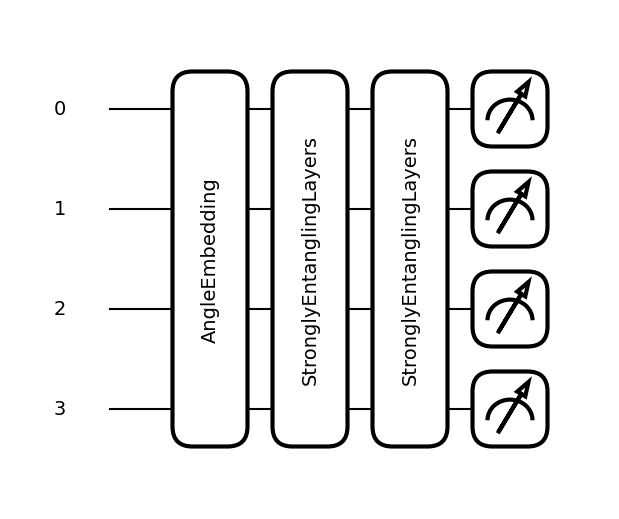

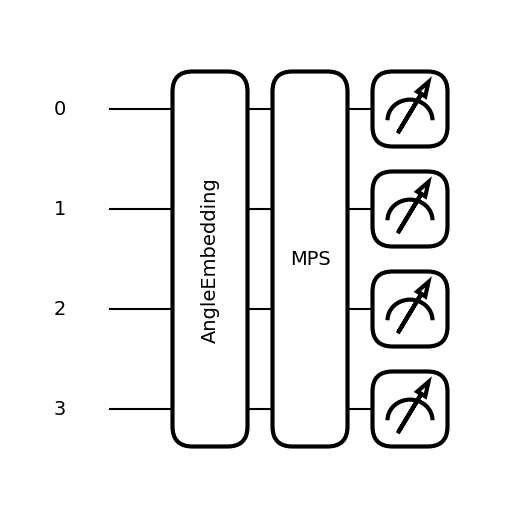

In [253]:
import pennylane as qml
from pennylane.templates import AngleEmbedding, StronglyEntanglingLayers, MPS
import numpy as np
import random

# Define the number of qubits and other parameters
n_wires = 4  # Number of qubits
n_layers = 2  # Number of layers


### FOR THE MPS, we need to define a block:
# Define the number of qubits
n_wires = X_test.shape[1]  # n_features
n_block_wires = 2
n_params_block = 4  # Two RY gates per qubit
n_blocks = qml.MPS.get_n_blocks(range(n_wires), n_block_wires)

def initialize_parameters(n_layers=n_layers, n_qubits=n_wires, layer_type = 0):
    """Initialize random parameters for MPS (0) or StronglyEntangling Layers (1)."""
    if layer_type == 0:
        ## MPS
        return npp.array([[random.uniform(0, 2) * np.pi for _ in range(n_params_block)] for _ in range(n_blocks)])
    elif layer_type == 1:
        ## StronglyEntangling
        shape = qml.StronglyEntanglingLayers.shape(n_layers=n_layers, n_wires=n_qubits)
        return npp.random.random(size=shape)



def state_preparation(x):
    """Encode the classical data into a quantum state."""
    AngleEmbedding(x, wires=range(n_wires))

dev_var = qml.device("lightning.qubit", wires=range(n_wires))
@qml.qnode(dev_var, diff_method="parameter-shift")

def quantum_circuit(x, params, layer_type):
    """Build the quantum circuit based on the specified layer type."""
    # Encode the classical data
    x = npp.array(x) / npp.linalg.norm(x)
    state_preparation(x)
    
    # Create the specified layer type (MPS = 0, StronglyEntangling = 1)
    if layer_type == 0:
        def block(weights, wires):
            qml.RY(weights[0], wires = wires[0])
            qml.RY(weights[1], wires = wires[1])
            qml.CNOT(wires=[wires[0],wires[1]])
            qml.RY(weights[2], wires=wires[0])
            qml.RY(weights[3], wires=wires[1])

        qml.MPS(range(n_wires), n_block_wires, block, n_params_block, params)
    elif layer_type == 1:
        for _ in range(n_layers):
            qml.StronglyEntanglingLayers(weights=params, wires=range(n_wires))
    
    return qml.expval(qml.sum(*[qml.PauliZ(i) for i in range(n_wires)]))

# Example usage

# Draw the circuit
fig, ax = qml.draw_mpl(quantum_circuit)(X_train[1], initialize_parameters(layer_type = 1), layer_type =1)
plt.show()


fig, ax = qml.draw_mpl(quantum_circuit)(X_train[1], initialize_parameters(layer_type = 0), layer_type =0)
plt.show()

In [254]:
X_train.shape

(6954, 4)

## Define the model

In [260]:
import time
from pennylane.optimize import AdamOptimizer,GradientDescentOptimizer 

def square_loss(labels, predictions):
    """Calculates the square loss between labels and predictions."""
    loss = 0
    for l, p in zip(labels, predictions):
        loss += (l - p) ** 2
    return np.array(loss / len(labels))



def accuracy(labels, predictions):
    """Calculates the accuracy between labels and predictions. If """
    binary_predictions = [1 if pred > 0 else 0 for pred in predictions]
    correct_predictions = sum([1 for pred, label in zip(binary_predictions, labels) if pred == label])
    accuracy = correct_predictions / len(labels)
    return accuracy

def cost(params, X, Y, layer_type):
    """Calculates the cost using the quantum circuit predictions."""
    predictions = [quantum_circuit(x, params, layer_type) for x in X]
    return square_loss(Y, predictions)

# Optimization
opt1 = AdamOptimizer(0.2)

epoch_losses = []
epoch_val_acc = []
epoch_time = []

def optimization_step(params, layer_type, opt=opt1, X_train=npp.array(X_train, requires_grad = False), y_train=npp.array(y_train, requires_grad = False), batch_size=700, num_epochs=5):
    """Runs the optimization step for training the quantum circuit. We use a mini-batch protocol, where we will randomly choose between {fct_param:batch_size}
    samples of X_train for the analysis. Overall, we will run 5 different mini-batches for each epoch.
    
        
    
    """
    num_batches = len(X_train) // batch_size
    
    # Keep track of the time
    step_time = time.time()
    
    for epoch in range(num_epochs):
        total_losses = []
        total_val_acc = []
        time_list = []
        print(f"Epoch {epoch+1}")

        # Select random batches for this epoch
        random_batches = random.sample(range(num_batches), 3) ## Will RUN 3 different batches
        
        count = 1
        for j in random_batches:
            X_batch = X_train[j*batch_size:(j+1)*batch_size]
            y_batch = y_train[j*batch_size:(j+1)*batch_size]
            def wrapped_cost(params):
                return cost(params, X_batch, y_batch, layer_type)
            params = opt.step(wrapped_cost, params)
            loss = wrapped_cost(params)
            predictions = [np.sign(quantum_circuit(x, params, layer_type)) for x in X_batch]
            acc = accuracy(y_batch, predictions)
            total_val_acc.append(acc)
            total_losses.append(loss)
            time_list.append(time.time()-step_time)
            print(f"Iter: {epoch+1, count} | Cost: {loss:0.7f} | Accuracy: {acc:0.7f} | Time_of_step: {time.time()-step_time:0.7f}")
            step_time = time.time()
            count+=1

        
        epoch_losses.append(sum(total_losses) / len(total_losses))
        epoch_val_acc.append(sum(total_val_acc) / len(total_val_acc))
        epoch_time.append(sum(time_list) / len(time_list))

    return params, epoch_losses, epoch_val_acc, epoch_time



### MPS

In [261]:
params1, epoch_losses1, epoch_val_acc1, epoch_time1 = optimization_step(params =  initialize_parameters(layer_type=0), layer_type=0)

Epoch 1
Iter: (1, 1) | Cost: 2.6869403 | Accuracy: 0.4814286 | Time_of_step: 16.6181700
Iter: (1, 2) | Cost: 2.6669078 | Accuracy: 0.4885714 | Time_of_step: 13.0915470
Iter: (1, 3) | Cost: 2.6404218 | Accuracy: 0.4942857 | Time_of_step: 12.6170769
Epoch 2
Iter: (2, 1) | Cost: 2.6404218 | Accuracy: 0.4942857 | Time_of_step: 13.5905950
Iter: (2, 2) | Cost: 2.6669078 | Accuracy: 0.4885714 | Time_of_step: 15.4569840
Iter: (2, 3) | Cost: 2.6869403 | Accuracy: 0.4814286 | Time_of_step: 13.4261377
Epoch 3
Iter: (3, 1) | Cost: 2.6404218 | Accuracy: 0.4942857 | Time_of_step: 11.8043673
Iter: (3, 2) | Cost: 2.6091373 | Accuracy: 0.5157143 | Time_of_step: 13.0238178
Iter: (3, 3) | Cost: 2.5998498 | Accuracy: 0.5157143 | Time_of_step: 12.2938132
Epoch 4
Iter: (4, 1) | Cost: 2.5998498 | Accuracy: 0.5157143 | Time_of_step: 12.1785390
Iter: (4, 2) | Cost: 2.6033690 | Accuracy: 0.5057143 | Time_of_step: 11.0906200
Iter: (4, 3) | Cost: 2.6660000 | Accuracy: 0.4842857 | Time_of_step: 11.3231180
Epoch 5


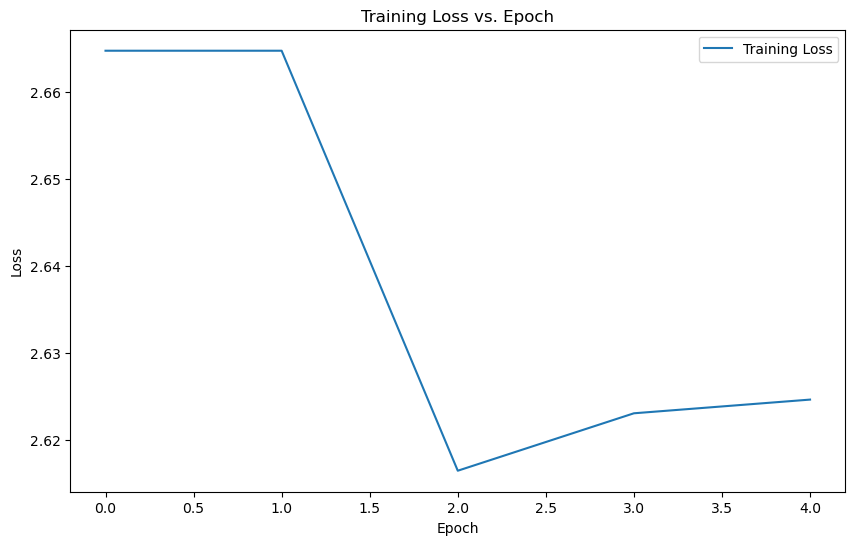

Validation Loss: 2.511213341000575, Validation Accuracy: 0.496262219666475


In [262]:
# Plotting the loss function versus epochs
plt.figure(figsize=(10, 6))
plt.plot(range(len(epoch_losses1)), epoch_losses1, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs. Epoch')
plt.legend()
plt.show()

# Assuming you have validation data X_val and y_val
predictions_val = [np.sign(quantum_circuit(x, params1, layer_type=0)) for x in X_test]
val_loss1 = square_loss(y_test, predictions_val)
val_accuracy1 = accuracy(y_test, predictions_val)

print(f"Validation Loss: {val_loss1}, Validation Accuracy: {val_accuracy1}")

#### So the MPS layers is no better than a random guess. Let us check if a stronger entanglement between qubits could improve the model

### Strongly Entangling Layers

In [258]:
params2, epoch_losses2, epoch_val_acc2, epoch_time2 = optimization_step(params =  initialize_parameters(layer_type=1), layer_type=1)

Epoch 1
Iter: (1, 1) | Cost: 0.6529340 | Accuracy: 0.5114286 | Time_of_step: 22.2786851
Iter: (1, 2) | Cost: 0.6924362 | Accuracy: 0.5157143 | Time_of_step: 25.5824571
Iter: (1, 3) | Cost: 0.6700724 | Accuracy: 0.5185714 | Time_of_step: 25.0785091
Epoch 2
Iter: (2, 1) | Cost: 0.6859839 | Accuracy: 0.4857143 | Time_of_step: 24.2865548
Iter: (2, 2) | Cost: 0.6622735 | Accuracy: 0.5228571 | Time_of_step: 24.7966914
Iter: (2, 3) | Cost: 0.7292303 | Accuracy: 0.4857143 | Time_of_step: 27.5951099
Epoch 3
Iter: (3, 1) | Cost: 0.6859839 | Accuracy: 0.4857143 | Time_of_step: 24.9840491
Iter: (3, 2) | Cost: 0.6847340 | Accuracy: 0.4842857 | Time_of_step: 22.3981192
Iter: (3, 3) | Cost: 0.7292303 | Accuracy: 0.4857143 | Time_of_step: 21.2686632
Epoch 4
Iter: (4, 1) | Cost: 0.6906673 | Accuracy: 0.5057143 | Time_of_step: 27.0439901
Iter: (4, 2) | Cost: 0.6622735 | Accuracy: 0.5228571 | Time_of_step: 25.5794430
Iter: (4, 3) | Cost: 0.6529340 | Accuracy: 0.5114286 | Time_of_step: 26.4520428
Epoch 5


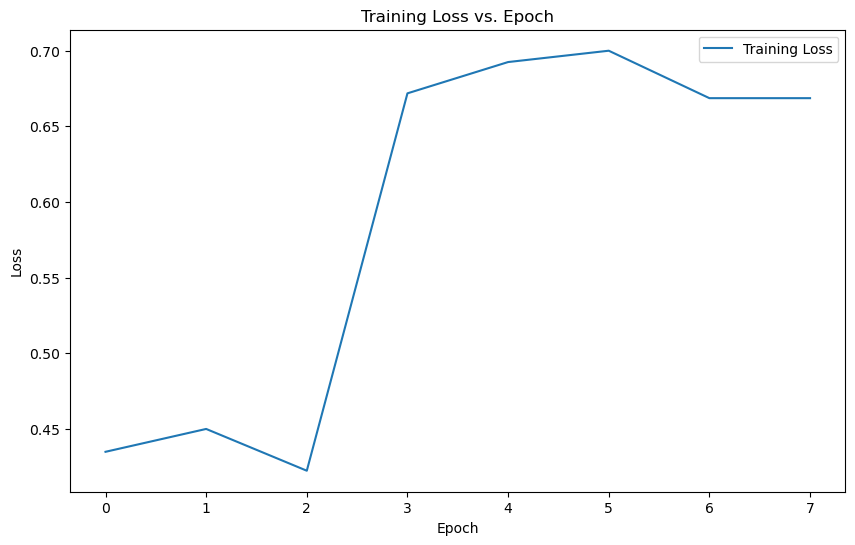

Validation Loss: 0.496262219666475, Validation Accuracy: 0.503737780333525


In [259]:
# Plotting the loss function versus epochs
plt.figure(figsize=(10, 6))
plt.plot(range(len(epoch_losses2)), epoch_losses2, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs. Epoch')
plt.legend()
plt.show()

# Assuming you have validation data X_val and y_val
predictions_val = [np.sign(quantum_circuit(x, params2, layer_type=1)) for x in X_test]
val_loss2 = square_loss(y_test, predictions_val)
val_accuracy2 = accuracy(y_test, predictions_val)

print(f"Validation Loss: {val_loss2}, Validation Accuracy: {val_accuracy2}")

#### The strongly entangling layers do not improve the accuracy. It seems that the variational circuit is a bad representation for this type of dataset.

### <span style="color:red"> It looks like there is a fault with the optimizer in general. It does not look like the optimizer is capable of selecting the appropriate parameters to shift to to reduce the loss function </span>

# Kernel-Based

In [322]:
import numpy as np
import torch
from torch.nn.functional import relu

from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pennylane as qml
from pennylane.templates import AngleEmbedding, StronglyEntanglingLayers
from pennylane.operation import Tensor

import matplotlib.pyplot as plt

# ------------------------------------------------------------------------------------------------------------------------------------------    

dev_kernel = qml.device("lightning.qubit", wires=n_wires)

projector = np.zeros((2**n_wires, 2**n_wires))
projector[0, 0] = 1

@qml.qnode(dev_kernel)
def kernel(x1, x2):
    """The quantum kernel."""
    AngleEmbedding(x1, wires=range(n_wires))
    qml.adjoint(AngleEmbedding)(x2, wires=range(n_wires))
    return qml.expval(qml.Hermitian(projector, wires=range(n_wires)))


# ------------------------------------------------------------------------------------------------------------------------------------------    

print("Sanity Check: K[x1, x1] =", kernel(X_train[0], X_train[0]))


# ------------------------------------------------------------------------------------------------------------------------------------------    

def kernel_matrix(A, B):
    """Compute the matrix whose entries are the kernel
       evaluated on pairwise data from sets A and B."""
    return np.array([[kernel(a, b) for b in B] for a in A])

# ------------------------------------------------------------------------------------------------------------------------------------------    



svm = SVC(kernel=kernel_matrix).fit(X_train[:50], y_train[:50])

# ------------------------------------------------------------------------------------------------------------------------------------------    

predictions = svm.predict(X_test)
accuracy_score(predictions, y_test)

# ------------------------------------------------------------------------------------------------------------------------------------------    

print("Accuracy score:", accuracy_score(predictions, y_test))
print("Number of thime the circuit run:", dev_kernel.num_executions)

Sanity Check: K[x1, x1] = 1.0
Accuracy score: 0.6348476135710178
Number of thime the circuit run: 89451


#### The code is better with a Kernel than with a variationa circuit. However, the Kernel has the disadvantage that it cannot be fitted to a large section of the dataset. In our case, we pick the first 100 data to train it.